<a href="https://colab.research.google.com/github/danterocha/danterocha/blob/main/atividade_pratica_07_Dante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <div align="center"> Atividade Prática 07 - Atividade sobre análise de dados vetoriais espaciaisI </div>

# <div align="center"> ***Dante Rocha Lomonaco - Maio / 2021*** </div>

<img src=https://jornal.usp.br/wp-content/uploads/2020/06/20200608_oceano_1130px.jpg alt="drawing" style="width:200px;"/>

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)  
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade 07 - template para atividade sobre análise de dados vetoriais espaciais

As you add code to this template please:

* Keep comments concise and strategic. Don't comment every line!
* Organize your code in a way that it's easy to follow. 
* Place ONLY the code needed to create a plot in the plot cells. Place additional processing code ABOVE that cell (in a separate code cell)
* Only include code, packages, and outputs that are CRUCIAL to your homework assignment. If there is extra items in your code, you will lose points!


In [1]:
## Import packages and set working directory here
## Add code cells as you need to below

In [2]:
# RUN - no questions asked!
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

import os
os.chdir('spatialindex-src-1.8.5')

!./configure
!make
!make install

!pip install rtree
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   572k      0 --:--:-- --:--:-- --:--:--  571k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [3]:
# install necessary packages
!pip install geopandas
!pip install mapclassify

### Mount your Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# your path preffix
# /content/drive/MyDrive/Colab Notebooks/spatial-vector-lidar
my_path = 'Colab Notebooks/spatial-vector-lidar'

# do not change these lines
my_path = '/content/drive/MyDrive/' + my_path
my_path


'/content/drive/MyDrive/Colab Notebooks/spatial-vector-lidar'

## Plot 1 - Roads Map and Legend

Create a map of California roads:

1. Import the `madera-county-roads/tl_2013_06039_roads.shp` layer located in your `spatial-vector-lidar` data download.
2. Create a map that shows the madera roads layer, sjer plot locations and the `sjer_aoi` boundary (`sjer_crop.shp`).
3. Plot the roads so different **road types** (using the RTTYP field) are represented using unique symbology. Use the `RTTYP` field to plot unique road types.
4. Map the plot locations by the attribute **plot type** using unique symbology for each "type".
4. Add a **title** to your plot.
5. Adjust your plot legend so that the full name for each `RTTYP` name is clearly represented in your legend. HINT: You will need to consult the metadata for that layer to determine what each `RTTYP` type represents.
6. Be sure that your plot legend is not covering your data.

**IMPORTANT:** be sure that all of the data are within the same `EXTENT` and `crs` of the `sjer_aoi` layer. This means that you may have to crop and reproject your data prior to plotting it!

In [6]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Plot data inline
plt.ion()

##############################################################################################################################
# define variable madera_roads_path
madera_roads_path = my_path + '/california/madera-county-roads/tl_2013_06039_roads.shp'

# Import shapefile using geopandas
madera_roads = gpd.read_file(madera_roads_path)

# Assign crs to myCRS object - this is just an example of how you would do that
madera_roads = madera_roads.to_crs(epsg=4326)

##############################################################################################################################
# define variable plot_centroid_path
sjer_plot_locations_path = my_path + '/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp'

# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(sjer_plot_locations_path)

# Assign crs to myCRS object - this is just an example of how you would do that
sjer_plot_locations = sjer_plot_locations.to_crs(epsg=4326)

##############################################################################################################################
# define variable plot_sjer_aoi boundary_path
sjer_aoi_boundary_path = my_path + '/california/neon-sjer-site/vector_data/SJER_crop.shp'

# Import shapefile using geopandas
sjer_aoi_boundary = gpd.read_file(sjer_aoi_boundary_path)

# Assign crs to myCRS object - this is just an example of how you would do that
sjer_aoi_boundary = sjer_aoi_boundary.to_crs(epsg=4326)

#################################################################################################################################
# Clip the data using GeoPandas clip
madera_roads = gpd.clip(madera_roads, sjer_aoi_boundary)

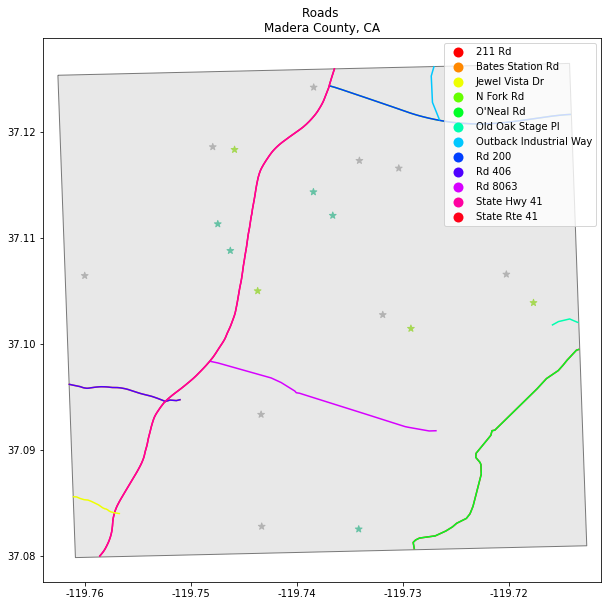

In [7]:
## PLOT 1 - Place the code required to plot your data only here
## additional processing code can go above this code cell

fig, ax = plt.subplots(figsize=(10, 10))
# First setup the plot using the crop_extent layer as the base layer
sjer_aoi_boundary.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=0.5,
                      ax=ax)

# Plot the data and add a legend
sjer_plot_locations.plot(column = 'plot_type',
                         categorical=True,
                         legend=True,
                         markersize=50,
                         marker='*',
                         cmap='Set2',
                         ax=ax)

# Plot the data and add a legend
madera_roads.plot(column = 'FULLNAME',
                  categorical=True,
                  legend=True,
                  legend_kwds={'loc': 'best'},
                  markersize=45,
                  cmap='hsv',
                  ax=ax)



#Set Axis Limits
xlim = ([sjer_aoi_boundary.total_bounds[0],  sjer_aoi_boundary.total_bounds[2]])
ylim = ([sjer_aoi_boundary.total_bounds[1],  sjer_aoi_boundary.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)



from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Add a title
ax.set_title('Roads \nMadera County, CA')
plt.axis('equal')
plt.show()



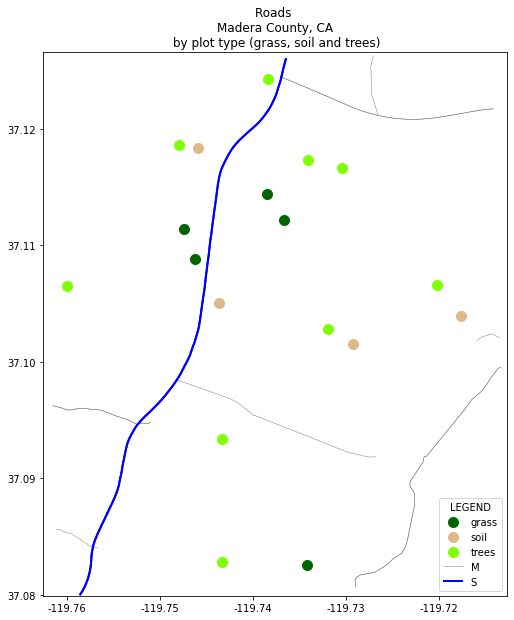

In [8]:
pointsPalette = {'trees': 'chartreuse',
                 'grass': 'darkgreen', 'soil': 'burlywood'}
roadPalette = {'M': 'grey', 'S': "blue",
               'C': "magenta", 'Unknown': "lightgrey"}

lineWidths = {'M': .5, 'S': 2, 'C': 2, 'Unknown': .5}

fig, ax = plt.subplots(figsize=(10, 10))

for ctype, data in sjer_plot_locations.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype
    data.plot(color=color,
              ax=ax,
              label=label,
              markersize=100)
    
for ctype, data in madera_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype    
    data.plot(color=color,
              ax=ax,
              linewidth=lineWidths[ctype],
              label=label)
    
ax.set(title='Roads \nMadera County, CA\n by plot type (grass, soil and trees)')

ax.legend(fontsize=10,
          frameon=True,
          loc=('lower right'),
          title="LEGEND")


#Set Axis Limits
xlim = ([sjer_aoi_boundary.total_bounds[0],  sjer_aoi_boundary.total_bounds[2]])
ylim = ([sjer_aoi_boundary.total_bounds[1],  sjer_aoi_boundary.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)



from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

## Table 1 - Calculate Total Length of Road Siskiyou, Modoc, Del Norte County in California

Create a geopandas `data.frame` that shows the total length of road in each county in the state of California.
To calculate this use the following layers:

* Counties in California: `spatial-vector-lidar/california/ca_counties/CA_Counties_TIGER2016.shp` layer 
* Roads: `spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp` layer 

IMPORTANT: before performing this calculation, REPROJECT both data layers to albers `.to_crs({'init': 'epsg:5070'})`
Tips

* Both layers need to the in the SAME coordinate reference system for you to work with them together. 
* You will want to clip the roads to the boundary of California. The `unary_union` attribute will be useful for this clip operation!
* you may need to rename a column for this to work properly. You can use `dataframe.rename(columns = {'old-col-name':'new-col-name'}, inplace = True)` to rename a column in pandas. 
* To assign each road to it's respective county, you will need to do a spatial join using `.sjoin()`

* Finally calculate the length of each road segment. 

To calculate length of each line in your geodataframe , you can use the syntax `geopandas_dataframe_name.length`. Create a new column using the syntax:

`geopandas_dataframe_name["length"] = geopandas_dataframe_name.length`

* Summarize the data to calculate total length using pandas `.groupby()` on the county column name.

HINT: use: `pd.options.display.float_format = '{:.4f}'.format` if you'd like to turn off scientific notation for your outputs.


In [9]:
# define variable ca_counties_path
ca_counties_path = my_path + '/california/CA_Counties/CA_Counties_TIGER2016.shp'

# Import shapefile using geopandas
ca_counties = gpd.read_file(ca_counties_path)

# Assign crs to myCRS object - this is just an example of how you would do that
ca_counties = ca_counties.to_crs(epsg=5070)
######################################################################################

# define variable roads_world
roads_world_path = my_path + '/global/ne_10m_roads/ne_10m_roads.shp'

# Import shapefile using geopandas
roads_world = gpd.read_file(roads_world_path)

# Assign crs to myCRS object - this is just an example of how you would do that
roads_world = roads_world.to_crs(epsg=5070)


In [10]:
# Clip the data using GeoPandas clip
ca_roads = gpd.clip(roads_world, ca_counties)

In [11]:
#You can select multiple counties using follwing command:
ca_counties_NAME = ['Del Norte', 'Modoc','Siskiyou']
ca_counties_sub= ca_counties[ca_counties['NAME'].isin(ca_counties_NAME)]

# Roads within region
ca_roads_region = gpd.overlay(ca_roads,
                              ca_counties_sub,
                              how='intersection')
# Ignore missing/empty geometries
ca_roads_region = ca_roads_region[~ca_roads_region.is_empty]

In [12]:
## TABLE 1 - Place the code required to plot your data only here
## additional processing code can go above this code cell

# Turn off scientific notation
pd.options.display.float_format = '{:.4f}'.format

# Calculate the total length of road 
#road_albers_length = roads_albers[['index_right', 'length_km']]
ca_roads_region_length = ca_roads_region[['NAME', 'length_km' ]]


# Sum existing columns
ca_roads_region['rdlength'] = ca_roads_region.length
sub = ca_roads_region[['rdlength','NAME']].groupby('NAME').sum()
sub

,rdlength
NAME,
Del Norte,121307.4618
Modoc,245029.4069
Siskiyou,472428.0132


## Plot 2 - Roads in Del Norte, Modoc & Siskiyou Counties

Using the dataframe that you created above with each road assigned to the county that it is within, create a map of roads by county. Color the roads in each county using a unique color.

Below is a map of the road layers clipped to the three counties to help you check your answer!
HINT: use the `legend=True` argument in `.plot()` to create a legend.

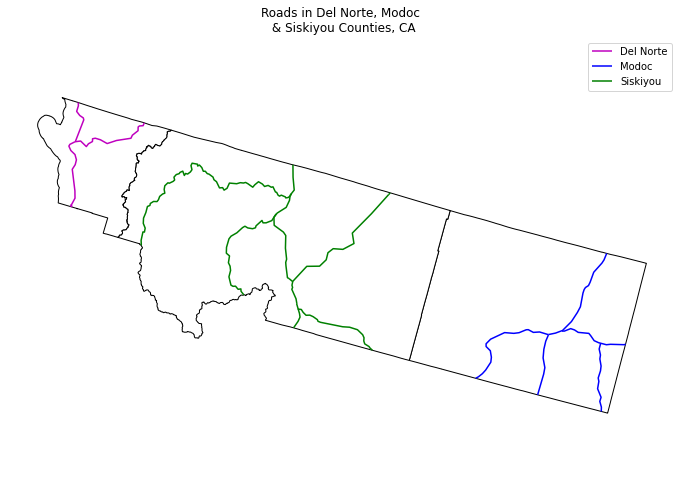

In [13]:
## PLOT 2 - Place the code required to plot your data only here
## Additional processing code can go above this code cell

# First, create a dictionary with the attributes of each legend item
road_attrs = {'Del Norte': ['m'],
              'Modoc': ['b'],
              'Siskiyou': ['green']}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

ca_counties_sub.plot(alpha=1,
                 color="white",
                 edgecolor="black",
                 ax=ax)

# iterate on the legend
for ctype, data in ca_roads_region.groupby('NAME'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax)

#Plot title
ax.set(title='Roads in Del Norte, Modoc \n & Siskiyou Counties, CA')



# This approach works to place the legend when you have defined labels
plt.legend(bbox_to_anchor=(1, 1), loc=1)
ax.set_axis_off()
plt.axis('equal')
plt.show()

## Plot 3a & b  - Quantile Maps for The USA

The 2014 census layer: `"data/spatial-vector-lidar/usa/usa-states-census-2014.shp"` contains an `ALAND` and `AWATER` attribute columns that represent calculated total land and water area for each state in the continental United States. Use this layer to summarize the data by `region`. Then provide a table that shows summary values for each attribute 

Use this layer to calculate mean values for `ALAND` and `AWATER` found in the attributes. 

In [14]:
# define variable usa_states_census_path
usa_states_census_path = my_path + '/usa/usa-states-census-2014.shp'

# Import shapefile using geopandas
usa_states_census = gpd.read_file(usa_states_census_path)
usa_states_census = usa_states_census.to_crs(epsg=4326)

# Dissolve by region
usa_states_census_region = usa_states_census.dissolve(by='region')

usa_states_census_region.head()

,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
region,,,,,,,,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881


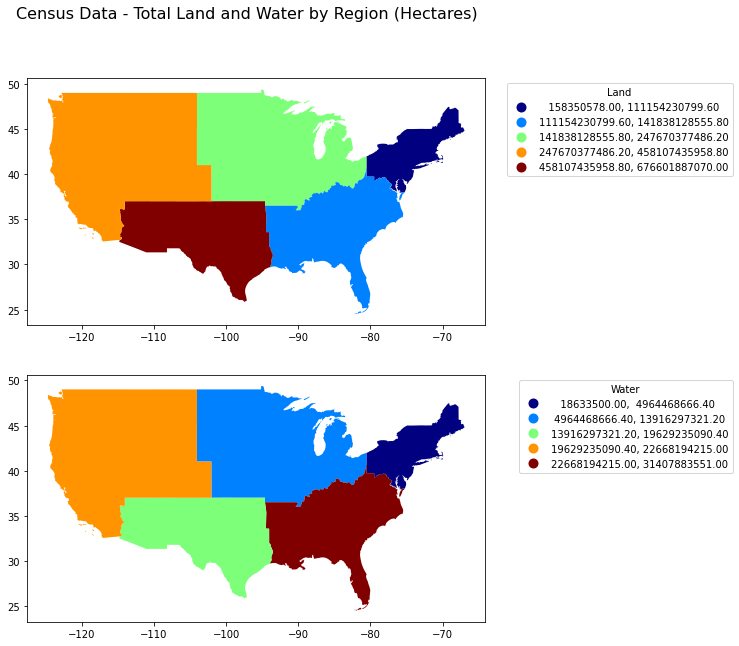

In [15]:
## PLOT 3a, b - Place the code required to plot your data only here
## Additional processing code can go above this code cell

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

usa_states_census_region.plot(column='ALAND',
                 legend=True,
                 scheme='quantiles',
                 cmap='jet',
                 ax=ax1)

usa_states_census_region.plot(column='AWATER',
                              legend=True,
                              scheme='quantiles',
                              cmap='jet',
                              ax=ax2)

plt.suptitle('Census Data - Total Land and Water by Region (Hectares)', fontsize=16)

leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.55,1))
leg.set_title("Land")

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.55,1))
leg.set_title("Water")

ax1.set_axis_on()
ax2.set_axis_on()

plt.show()

## Plot 4

1. Download the natural earth data using the code below. Be sure to add the download packate to the TOP of your notebook. It is just here as an example to highlight that you will need to use this package to download the data.

After you have downloaded the data, import the data and 
1. subset the data to include the following columns: `["REGION_WB", "CONTINENT", "POP_RANK","POP_EST", 'geometry']`
2. Dissolve the data by region (`REGION_WB`) column and aggregate by sum and mean. HINT: you can provide the aggfun= argument with a [list] of functions in quotes and it will summarize numeric columns using each function
3. Create two plots within one matplotlib figure 
    a. Create a plot of the sum estimated population (`POP_EST`) by region
    b. Create a plot of the mean population range (`POP_RANK`) by region
    
You can use the code below to download and unzip the data from the Natural Earth website.
Please note that the download function was written to take

1. a download path - this is the directory where you want to store your data
2. a url - this is the URL where the data are located. The URL below might look odd as it has two "http" strings in it but it is how the url's are organized on natural earth and should work. 

The `download()` function will unzip your data for you and place it in the directory that you specify. 

In [16]:
# define variable usa_states_census_path
world_path = my_path + '/global/ne_110m_admin_0_countries.shp'

# Import shapefile using geopandas
world = gpd.read_file(world_path)

world = world[['REGION_WB', 'CONTINENT', 'POP_RANK','POP_EST', 'geometry']]

# Dissolve by region aggregate by sum
world_region_sum = world.dissolve(by='REGION_WB', aggfunc='sum')

# Dissolve by region aggregate by mean
world_region_mean = world.dissolve(by='REGION_WB', aggfunc='mean')


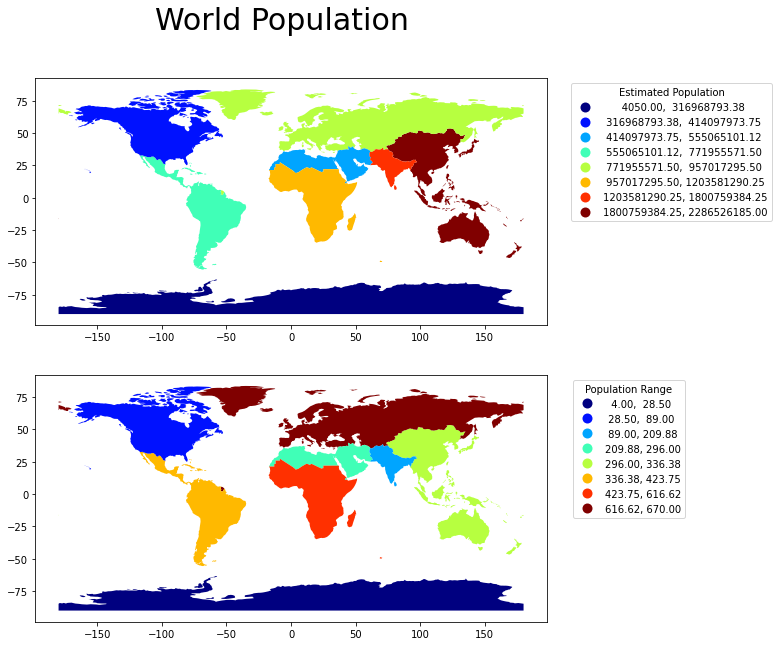

In [18]:
## PLOT 4 - Place the code required to plot your data only here
## Additional processing code can go above this code cell
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

import mapclassify
bins = mapclassify.Quantiles(world_region_sum['POP_EST'], k=8).bins
world_region_sum.plot(column='POP_EST',
                 legend=True,
                 scheme="User_Defined", 
                 classification_kwds=dict(bins=bins),
                 cmap='jet',
                 ax=ax1)

bins = mapclassify.Quantiles(world_region_sum['POP_RANK'], k=8).bins
world_region_sum.plot(column='POP_RANK',
                      legend=True,
                      scheme="User_Defined",
                      classification_kwds=dict(bins=bins),
                      cmap='jet',
                      ax=ax2)

plt.suptitle('World Population', fontsize=30)

leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.45,1))
leg.set_title("Estimated Population")

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.28,1))
leg.set_title("Population Range")

ax1.set_axis_on()
ax2.set_axis_on()

plt.show()